In [1]:
### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/HRAnalyticsAnalyticsVidhya/sample_submission_M0L0uXE.csv
/kaggle/input/HRAnalyticsAnalyticsVidhya/train_LZdllcl.csv
/kaggle/input/HRAnalyticsAnalyticsVidhya/test_2umaH9m.csv


In [2]:
#pip install lazypredict

In [3]:
#pip install imbalanced-learn

In [4]:
%config Completer.use_jedi = False

In [5]:
test = pd.read_csv('../input/HRAnalyticsAnalyticsVidhya/test_2umaH9m.csv')
train = pd.read_csv('../input/HRAnalyticsAnalyticsVidhya/train_LZdllcl.csv')
sample = pd.read_csv('../input/HRAnalyticsAnalyticsVidhya/sample_submission_M0L0uXE.csv')

In [6]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [7]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [8]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [9]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [10]:
# I will use combined dataset for filling missing values
# train dataset for visualization
combined = pd.concat([train, test]).copy()
display(combined.head())
display(combined.tail())

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,NaN
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89,NaN


<AxesSubplot:>

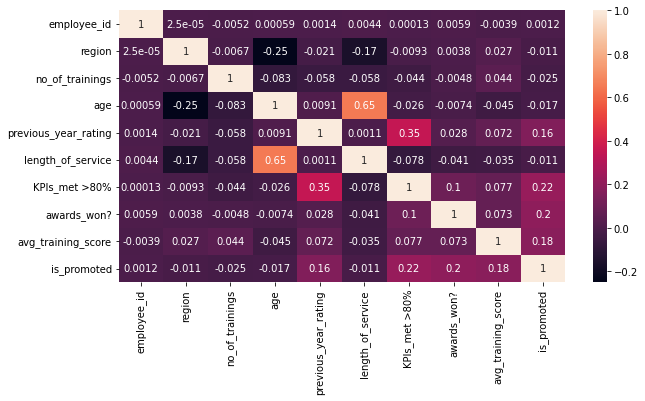

In [11]:
# Correlation matrix
# Also controlled correlation between region number and promoted
combined2 = combined.copy()
combined2['region'] = combined2['region'].apply(lambda x: x.split('_')[1]).astype('int64')

plt.figure(figsize=(10,5))
sns.heatmap(data=combined2.corr(),
            annot=True)

Text(0.5, 1.0, 'Target distribution')

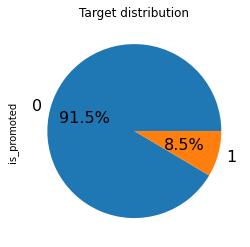

In [12]:
plt.figure(figsize=(4,4))

# Pie plot
train['is_promoted'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':16}).set_title("Target distribution")


In [13]:
# Categorical features
cat_feats = []
# Qualitative features
qual_feats = []
# Ordinal features
ord_feats = []

In [14]:
"""
fig=plt.figure(figsize=(15,20))
for i, feature in enumerate(cat_feats):
    ax = fig.add_subplot(len(cat_feats), 1, i+1)
    sns.histplot(data= train, x=feature, axes=ax, hue='is_promoted')
    ax.set_title(feature)
fig.tight_layout()
"""

"\nfig=plt.figure(figsize=(15,20))\nfor i, feature in enumerate(cat_feats):\n    ax = fig.add_subplot(len(cat_feats), 1, i+1)\n    sns.histplot(data= train, x=feature, axes=ax, hue='is_promoted')\n    ax.set_title(feature)\nfig.tight_layout()\n"

In [15]:
"""
fig=plt.figure(figsize=(15,20))
for i, feature in enumerate(qual_feats):
    ax = fig.add_subplot(len(cat_feats), 1, i+1)
    sns.histplot(data= train, x=feature, axes=ax, hue='is_promoted', binwidth=1, kde=True)
    ax.set_title(feature), 
fig.tight_layout()
"""

"\nfig=plt.figure(figsize=(15,20))\nfor i, feature in enumerate(qual_feats):\n    ax = fig.add_subplot(len(cat_feats), 1, i+1)\n    sns.histplot(data= train, x=feature, axes=ax, hue='is_promoted', binwidth=1, kde=True)\n    ax.set_title(feature), \nfig.tight_layout()\n"

In [16]:
print('% Percentage of missing values')
combined.isna().sum() / combined.shape[0] * 100

% Percentage of missing values


employee_id              0.000000
department               0.000000
region                   0.000000
education                4.397303
gender                   0.000000
recruitment_channel      0.000000
no_of_trainings          0.000000
age                      0.000000
previous_year_rating     7.581292
length_of_service        0.000000
KPIs_met >80%            0.000000
awards_won?              0.000000
avg_training_score       0.000000
is_promoted             30.000766
dtype: float64

# **Department**

<AxesSubplot:xlabel='department', ylabel='Count'>

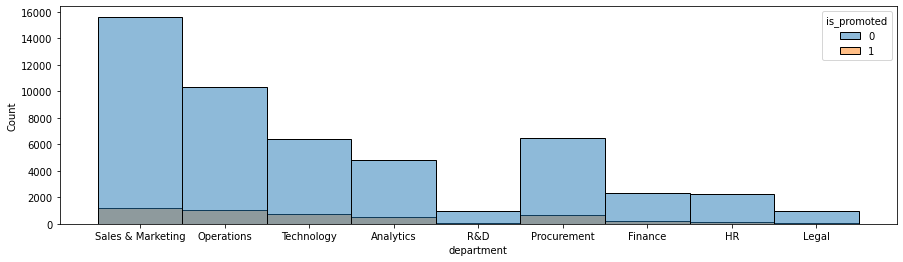

In [17]:
plt.figure(figsize=(15,4))
sns.histplot(data=train, x='department', hue='is_promoted')

In [18]:
cat_feats.append('department')

# **Region**

<AxesSubplot:xlabel='region', ylabel='Count'>

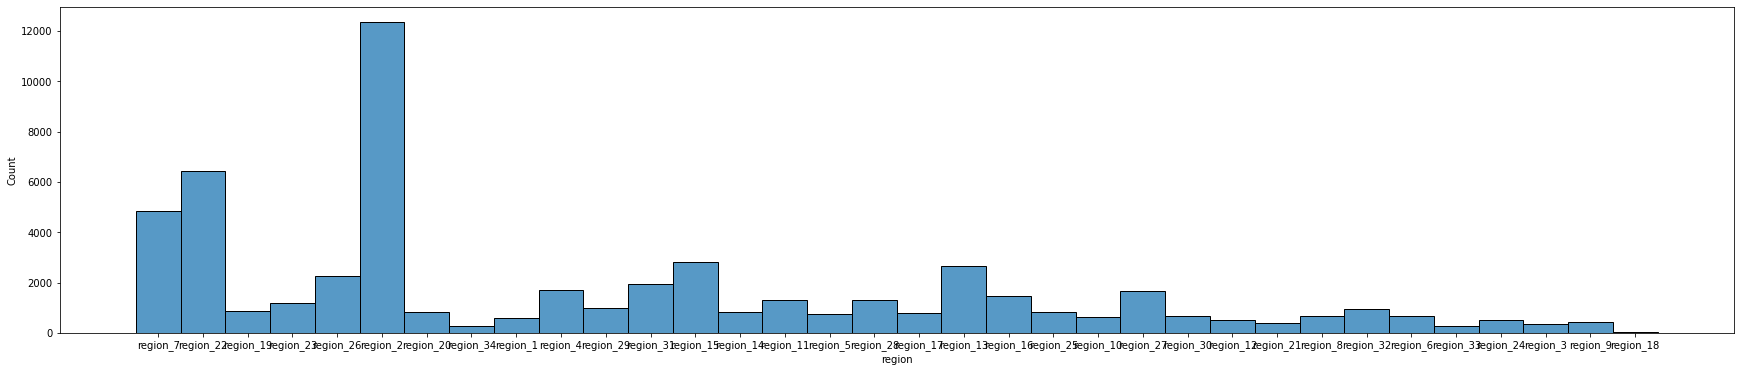

In [19]:
plt.figure(figsize=(30,6))
sns.histplot(data=train, x='region')

In [20]:
cat_feats.append('region')

# **Education**

<AxesSubplot:xlabel='education', ylabel='Count'>

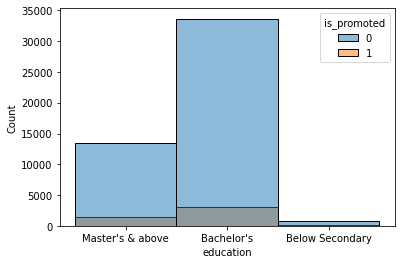

In [21]:
#plt.figure(figsize=(15,4))
sns.histplot(data=train, x='education', hue='is_promoted', )

In [22]:
display(train.education.value_counts())
list(enumerate(train.education.value_counts()))

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

[(0, 36669), (1, 14925), (2, 805)]

In [23]:
bachelor_promote_percentage = (train[train.education == "Bachelor's"])[train['is_promoted']==1].shape[0] / 36669 * 100
master_promote_percentage = (train[train.education == "Master's & above"])[train['is_promoted']==1].shape[0] / 14925 * 100
below_promote_percentage = (train[train.education == "Below Secondary"])[train['is_promoted']==1].shape[0] / 805 * 100

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
print('bachelor_promoted_percentage:', bachelor_promote_percentage)
print('masterr_promoted_percentage:',master_promote_percentage)
print('below_promoted_percentage:',below_promote_percentage)

bachelor_promoted_percentage: 8.20311434726881
masterr_promoted_percentage: 9.855946398659967
below_promoted_percentage: 8.322981366459627


In [25]:
combined.education.fillna("Bachelor's", inplace=True)

In [26]:
combined.education = combined.education.map({
    "Below Secondary":0,
    "Bachelor's":1,
    "Master's & above":2
})

In [27]:
ord_feats.append('education')

# **Gender**

<AxesSubplot:xlabel='gender', ylabel='Count'>

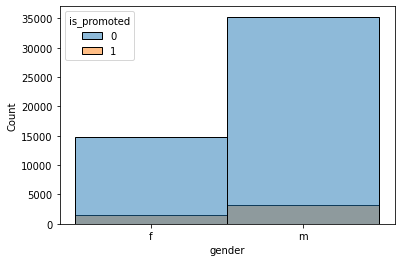

In [28]:
sns.histplot(data=train, x='gender', hue='is_promoted')

In [29]:
def hue_percentages(dataframe, column, hue, hue_what):
    percentage_dict = {}
    
    for var_name in dataframe[column].unique():
        percentage_dict[str(var_name + '_percentage')] = (dataframe[dataframe[column] == var_name])[dataframe[hue]==hue_what].shape[0] / (dataframe[column].value_counts()[var_name]  + 0.00000001) * 100
        
    display(percentage_dict)

In [30]:
hue_percentages(train, 'gender', 'is_promoted', 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


{'f_percentage': 8.993379107400077, 'm_percentage': 8.315149625933001}

In [31]:
cat_feats.append('gender')

# **Recruitment Channel**

<AxesSubplot:xlabel='recruitment_channel', ylabel='Count'>

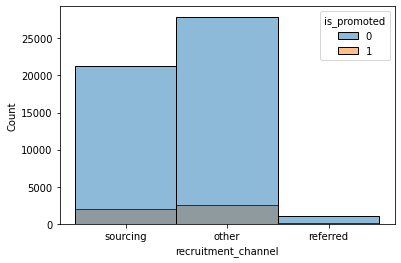

In [32]:
sns.histplot(data=train, x='recruitment_channel', hue='is_promoted')

In [33]:
hue_percentages(train, 'recruitment_channel', 'is_promoted', 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


{'sourcing_percentage': 8.501291989660421,
 'other_percentage': 8.395191486563622,
 'referred_percentage': 12.08406304717965}

In [34]:
cat_feats.append('recruitment_channel')

# **no_of_trainings**

(0.0, 300.0)

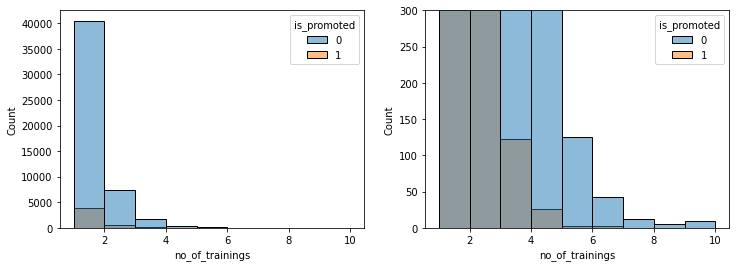

In [35]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=train, x='no_of_trainings', hue='is_promoted', binwidth=1)
plt.subplot(1,2,2)
sns.histplot(data=train, x='no_of_trainings', hue='is_promoted', binwidth=1)
plt.ylim(top=300)

In [36]:
qual_feats.append('no_of_trainings')

# **Age**

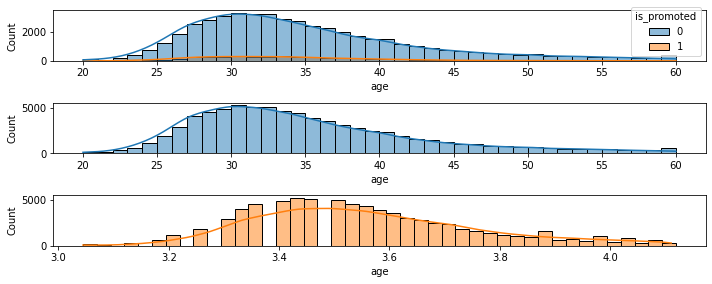

In [37]:
plt.figure(figsize=(10,4))
plt.subplot(3,1,1)
sns.histplot(data=train, x='age', binwidth=1, hue='is_promoted', kde=1)
plt.subplot(3,1,2)
sns.histplot(combined['age'], binwidth=1, kde=1)
plt.subplot(3,1,3)
sns.histplot(np.log1p(combined['age']), kde=1, binwidth=0.025, color='C1')
plt.tight_layout()

In [38]:
qual_feats.append('age')

# **previous_year_rating**

In [39]:
train[train['previous_year_rating'].isna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0


In [40]:
train[train['previous_year_rating'].isna()]['no_of_trainings'].unique()

array([1, 2, 4, 3, 6, 8, 5, 9, 7])

In [41]:
train[train['previous_year_rating'].isna()]['length_of_service'].unique()

array([1])

In [42]:
train[train['previous_year_rating'].isna()]['awards_won?'].unique()

array([0, 1])

Median= 3.0
Mode= 3.0


<AxesSubplot:xlabel='previous_year_rating', ylabel='Count'>

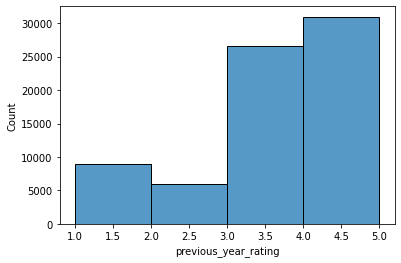

In [43]:
print('Median=', combined['previous_year_rating'].median())
print('Mode=', combined['previous_year_rating'].mode()[0])
sns.histplot(combined['previous_year_rating'], binwidth=1)

In [44]:
combined['previous_year_rating'].fillna(3, inplace=True)

In [45]:
qual_feats.append('previous_year_rating')

# **length_of_service**

<AxesSubplot:xlabel='length_of_service', ylabel='Count'>

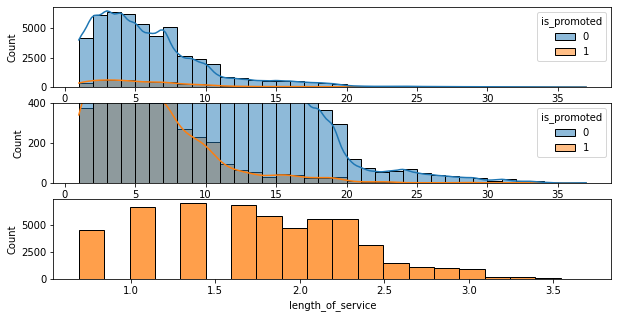

In [46]:
plt.figure(figsize=(10,5))
plt.subplot(3,1,1)
sns.histplot(data=train, x='length_of_service', binwidth=1, hue='is_promoted', kde=1)
plt.subplot(3,1,2)
sns.histplot(data=train, x='length_of_service', binwidth=1, hue='is_promoted', kde=1)
plt.ylim(top=400)
plt.subplot(3,1,3)
sns.histplot(np.log1p(train['length_of_service']), color='C1', binwidth=0.15)

In [47]:
qual_feats.append('length_of_service')

# **KPIs_met >80%**

<AxesSubplot:xlabel='KPIs_met >80%', ylabel='Count'>

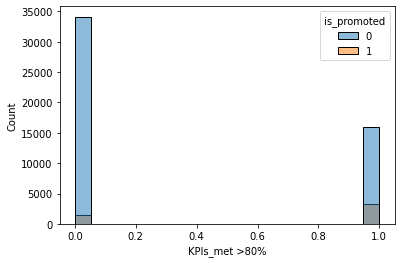

In [48]:
sns.histplot(data=train, x='KPIs_met >80%', hue='is_promoted')

In [49]:
cat_feats.append('KPIs_met >80%')

# **awards_won?**

(0.0, 1000.0)

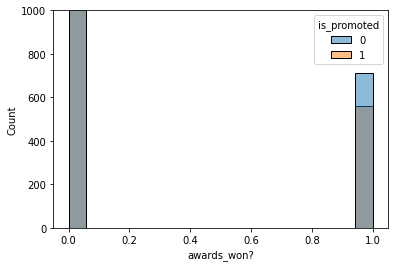

In [50]:
sns.histplot(data=train, x='awards_won?', hue='is_promoted')
plt.ylim(top=1000)

In [51]:
cat_feats.append('awards_won?')

# **avg_training_score**

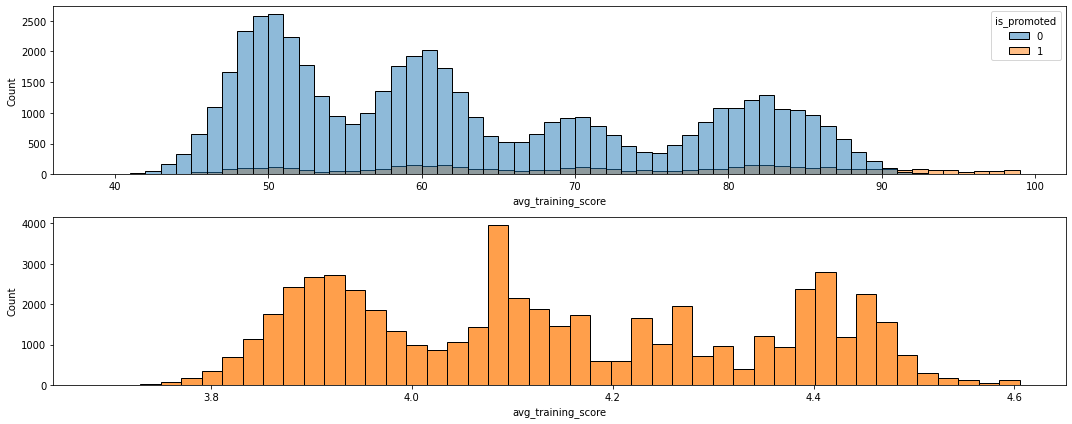

In [52]:
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
sns.histplot(data=train, x='avg_training_score', hue='is_promoted', binwidth=1)
plt.subplot(2,1,2)
sns.histplot(np.log1p(train['avg_training_score']), color='C1')
plt.tight_layout()

In [53]:
qual_feats.append('avg_training_score')

In [54]:
combined.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,2,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,1,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,1,m,sourcing,1,34,3.0,7,0,0,50,0.0


In [55]:
cat_feats

['department',
 'region',
 'gender',
 'recruitment_channel',
 'KPIs_met >80%',
 'awards_won?']

In [56]:
qual_feats

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'avg_training_score']

In [57]:
ord_feats

['education']

# **FE**

In [58]:
combinedX = combined.drop(labels=['is_promoted', 'employee_id'], axis=1).copy()
combinedX

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,2,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,1,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,region_19,1,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,region_23,1,m,other,2,39,1.0,10,0,0,50
4,Technology,region_26,1,m,other,1,45,3.0,2,0,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,Legal,region_2,0,m,sourcing,1,24,3.0,1,0,0,61
23486,Technology,region_25,1,m,sourcing,1,31,3.0,7,0,0,74
23487,HR,region_16,1,f,sourcing,1,26,4.0,4,0,0,50
23488,Procurement,region_31,1,m,sourcing,3,27,3.0,1,0,0,70


In [59]:
numerical_cols = [cname for cname in combinedX.columns if combinedX[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in combinedX.columns if combinedX[cname].dtype == "object"]

In [60]:
pd.get_dummies(combinedX[categorical_cols].drop('region', axis=1), drop_first=True).head()

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,1,0,1
3,0,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,0,0,0,1,1,0,0


In [61]:
combinedX_dummy = pd.concat(
    [combinedX[numerical_cols], pd.get_dummies(combinedX[categorical_cols].drop('region', axis=1), drop_first=True)],
    axis=1
)

In [62]:
combinedX_dummy.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,2,1,35,5.0,8,1,0,49,0,0,0,0,0,0,1,0,0,0,1
1,1,1,30,5.0,4,0,0,60,0,0,0,1,0,0,0,0,1,0,0
2,1,1,34,3.0,7,0,0,50,0,0,0,0,0,0,1,0,1,0,1
3,1,2,39,1.0,10,0,0,50,0,0,0,0,0,0,1,0,1,0,0
4,1,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,1,1,0,0


In [63]:
scaler = StandardScaler()

In [64]:
combinedX_dummy['age'] = scaler.fit_transform(combinedX_dummy[['age']])
combinedX_dummy['length_of_service'] = scaler.fit_transform(combinedX_dummy[['length_of_service']])
combinedX_dummy['avg_training_score'] = scaler.fit_transform(combinedX_dummy[['avg_training_score']])

In [65]:
X = combinedX_dummy[0:train.shape[0]]
X_test = combinedX_dummy[train.shape[0]:]
y = train['is_promoted']

In [66]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=42)

In [67]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [68]:
models,predictions = clf.fit(X_train, X_valid, y_train, y_valid)

100%|██████████| 29/29 [03:57<00:00,  8.21s/it]


In [69]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.74,0.70,0.70,0.80,0.11
DecisionTreeClassifier,0.90,0.69,0.69,0.90,0.20
QuadraticDiscriminantAnalysis,0.92,0.69,0.69,0.92,0.16
XGBClassifier,0.94,0.68,0.68,0.93,2.25
LGBMClassifier,0.95,0.68,0.68,0.93,0.44
BaggingClassifier,0.93,0.67,0.67,0.92,0.98
ExtraTreesClassifier,0.93,0.67,0.67,0.92,3.95
RandomForestClassifier,0.94,0.67,0.67,0.93,3.86
PassiveAggressiveClassifier,0.89,0.67,0.67,0.89,0.13


Text(0.5, 1.0, 'Target distribution')

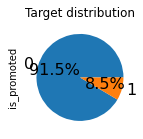

In [70]:
plt.figure(figsize=(2,2))

# Pie plot
train['is_promoted'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':16}).set_title("Target distribution")

In [71]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm_balanced = LGBMClassifier()

# UNBALANCED

In [86]:
lgbm.fit(X_train, y_train)
lgbm.score(X_valid, y_valid)

0.9440795475278234

In [76]:
from sklearn.metrics import f1_score
f1_score(y_valid, lgbm.predict(X_valid), average='macro')

0.7382028232242801

In [94]:
random_search.score(X_valid, y_valid)

0.9442619959861339

In [95]:
random_search.best_params_

{'num_leaves ': 10,
 'min_data_in_leaf': 10,
 'max_depth': 5,
 'learning_rate': 0.15,
 'lambda': 0.01,
 'eval_metric': 'auc',
 'boosting': 'goss'}

# BALANCED

In [77]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_balanced, y_balanced = sm.fit_resample(X, y)

<AxesSubplot:ylabel='is_promoted'>

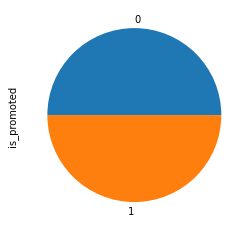

In [78]:
y_balanced.value_counts().plot.pie()

In [79]:
X_train_balanced, X_valid_balanced, y_train_balanced, y_valid_balanced = train_test_split(X_balanced,y_balanced,test_size=0.2,random_state=42)

In [80]:
lgbm_balanced.fit(X_train_balanced, y_train_balanced)
lgbm_balanced.score(X_valid_balanced, y_valid_balanced)

0.9582169924212206

In [81]:
from sklearn.metrics import f1_score
f1_score(y_valid_balanced, lgbm_balanced.predict(X_valid_balanced), average='macro')

0.9581025937285413

# **FINAL**

In [100]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(num_leaves=10, max_depth=5, learning_rate=0.15, eval='auc', boosting_type='goss')

lgbm.fit(X,y)
lgbm_balanced.fit(X_balanced,y_balanced)

LGBMClassifier()

In [101]:
submission=pd.DataFrame()
submission['employee_id'] = test['employee_id']
submission['is_promoted'] = lgbm.predict(X_test)
submission.to_csv('submission.csv', index=False)

In [85]:
submission_balanced=pd.DataFrame()
submission_balanced['employee_id'] = test['employee_id']
submission_balanced['is_promoted'] = lgbm_balanced.predict(X_test)
submission_balanced.to_csv('submission_balanced.csv', index=False)